In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD

from preprocess import get_mnist
from preprocess import get_mvtec, get_multi_mvtec

In [2]:
class Args:

    num_epochs=1
    num_epochs_ae=1
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=32
    normal_class = 1
    mvtec_dir = './data/mvtec__2'

    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # mnist datset
# data = get_mnist(args)

# mvtec dataset(custom dataset)
data = get_multi_mvtec(args.mvtec_dir)
deep_SVDD = TrainerDeepSVDD(args, data, device)



Counter({5: 391, 9: 320, 3: 280, 8: 267, 4: 264, 13: 247, 7: 245, 14: 240, 10: 230, 1: 224, 6: 220, 2: 219, 12: 213, 0: 209, 11: 60})
Counter({8: 167, 9: 160, 14: 151, 1: 150, 2: 132, 7: 124, 3: 117, 10: 117, 6: 115, 5: 110, 12: 100, 0: 83, 13: 79, 4: 78, 11: 42})


In [3]:
if args.pretrain:
    deep_SVDD.pretrain()

  32/3629: [>...............................] - ETA 0.0storch.Size([32, 2, 4, 4])
  64/3629: [>...............................] - ETA 270.4storch.Size([32, 2, 4, 4])
  96/3629: [>...............................] - ETA 268.0storch.Size([32, 2, 4, 4])
 128/3629: [>...............................] - ETA 265.6storch.Size([32, 2, 4, 4])
 160/3629: [=>..............................] - ETA 263.2storch.Size([32, 2, 4, 4])
 192/3629: [=>..............................] - ETA 260.8storch.Size([32, 2, 4, 4])
 224/3629: [=>..............................] - ETA 258.4storch.Size([32, 2, 4, 4])
 256/3629: [=>..............................] - ETA 256.0storch.Size([32, 2, 4, 4])
 288/3629: [==>.............................] - ETA 253.6storch.Size([32, 2, 4, 4])
 320/3629: [==>.............................] - ETA 251.2storch.Size([32, 2, 4, 4])
 352/3629: [==>.............................] - ETA 248.8storch.Size([32, 2, 4, 4])
 384/3629: [===>............................] - ETA 246.4storch.Size([32, 2, 4

In [4]:
deep_SVDD.train()

3629/3629: [===============================>] - ETA 2.2sss
Training Deep SVDD... Epoch: 0, Loss: 0.498


Testing...
encoded_data [[0.22553435 0.7117815  0.6281973  ... 1.1355959  0.9947302  0.2366645 ]
 [0.23650277 0.7097773  0.64713335 ... 1.1401175  0.99545705 0.22397505]
 [0.21954411 0.71369153 0.63100594 ... 1.1593975  1.0019023  0.21339603]
 ...
 [0.23778057 0.70268255 0.6258932  ... 1.1296049  0.9996781  0.2405088 ]
 [0.23742837 0.72202677 0.6467286  ... 1.1485645  1.001851   0.2389001 ]
 [0.22763948 0.71058387 0.6360249  ... 1.1395267  0.9913399  0.22575139]]
encoded_data_2d [[-32.42985    -9.65317  ]
 [  4.189396  -48.746014 ]
 [ 44.284126  -21.443638 ]
 ...
 [-26.603107   -2.790404 ]
 [  6.446858    5.6198273]
 [  0.4235717 -21.250061 ]]
c [  0.4235717 -21.250061 ]
labels [ 9  7 14 ...  6  1 10]


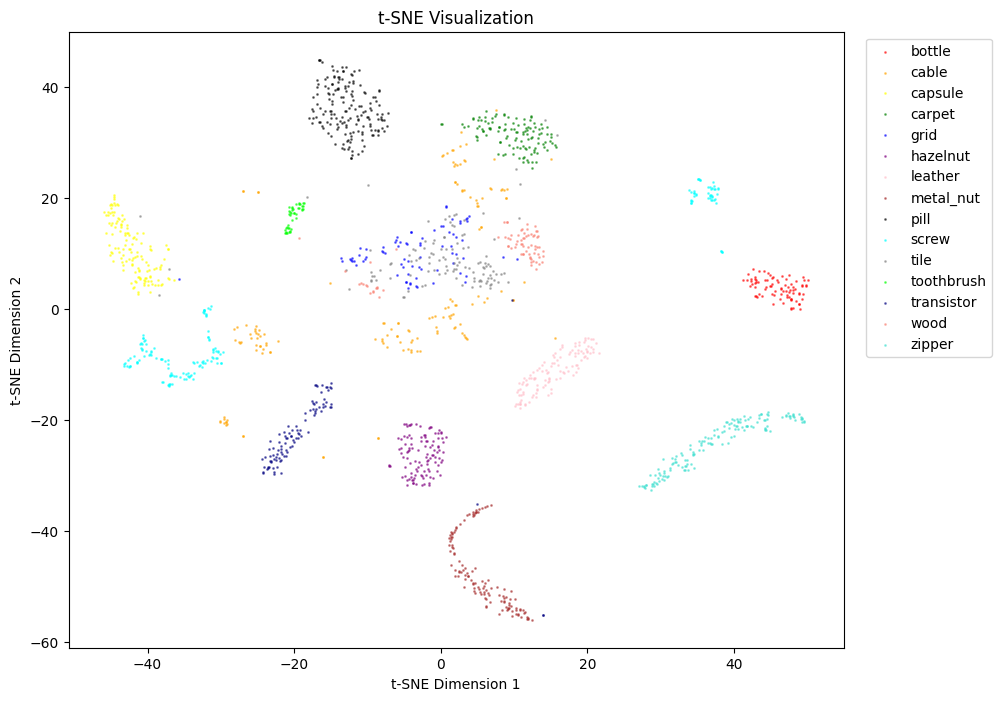

class_indices: [array([  45,   75,   86,  130,  154,  206,  220,  238,  287,  292,  298,
        301,  313,  316,  327,  334,  355,  375,  391,  403,  416,  446,
        477,  488,  489,  498,  500,  529,  538,  543,  544,  545,  550,
        594,  626,  641,  654,  691,  712,  715,  724,  733,  738,  740,
        741,  770,  779,  783,  802,  822,  842,  891,  904,  958,  961,
       1047, 1084, 1103, 1117, 1119, 1158, 1191, 1241, 1265, 1286, 1344,
       1362, 1378, 1425, 1454, 1480, 1497, 1527, 1532, 1540, 1545, 1548,
       1563, 1609, 1642, 1648, 1675, 1718]), array([  20,   26,   39,   54,   58,   62,   64,   77,  100,  102,  118,
        119,  121,  126,  128,  137,  142,  144,  164,  166,  168,  207,
        209,  219,  224,  237,  250,  254,  257,  273,  280,  285,  289,
        310,  320,  336,  337,  341,  342,  344,  352,  373,  382,  385,
        400,  405,  435,  470,  503,  504,  512,  536,  552,  563,  603,
        607,  609,  625,  627,  666,  683,  687,  708,  723,  7

In [5]:
from test import eval
# binary
# labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

# multi
labels, scores, accuracy, class_accuracy = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)


Scores (Inliers): [[0.00113455]
 [0.00113455]
 [0.00113455]
 ...
 [0.00456504]
 [0.00456504]
 [0.00456504]]
Scores (Outliers): [[0.00113455]
 [0.00124834]
 [0.00427096]
 ...
 [0.00047309]
 [0.0024222 ]
 [0.00456504]]


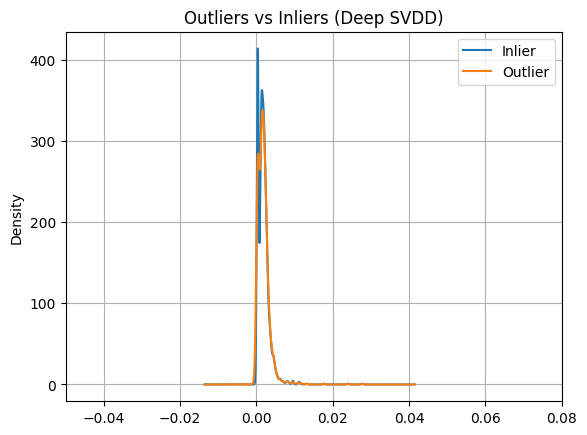

In [6]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]

# Print scores_in and scores_out
print("Scores (Inliers):", scores_in)
print("Scores (Outliers):", scores_out)


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()